In [119]:
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

In [120]:
# load the dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [121]:
# print the shape of training and testing dataset
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


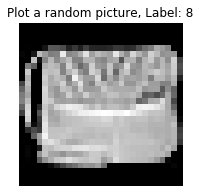

In [122]:
# Visualize
%matplotlib inline
import random
import matplotlib.pyplot as plt
# plot the random sample
rand = random.randint(0,x_train.shape[0])
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_title('Plot a random picture, Label: '+str(y_train[rand]))   
ax.axis('off')
plt.imshow(x_train[rand], cmap='gray')
plt.show()

In [123]:
x_train[0].max()

255

In [125]:
#a row in data is an image (28x28 reshaped into a vector of 784 elements)
# reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# rescale the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'test samples')

60000 training samples
10000 test samples


In [126]:
#reshape
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize the value of every pixel into the range of 0 to 1
x_train /= 255
x_test /= 255

In [127]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', x_test.shape, y_test.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


In [9]:
# Do not transform the shape of labels

In [10]:
y_train.shape

(54000,)

# Part1. Logistic Regression

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(random_state=0, multi_class='multinomial',solver='lbfgs')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

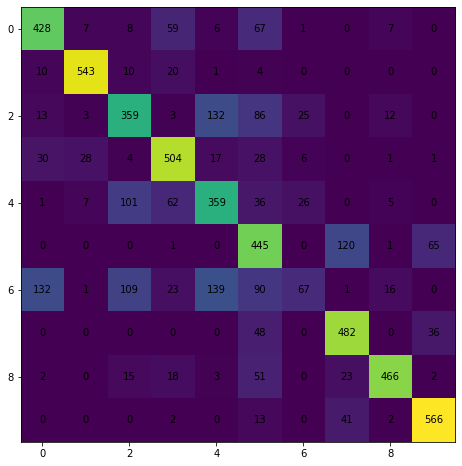

In [12]:
pred = logisticRegr.predict(x_val)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)

for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [71]:
# we need to use weighted classification accuracy
# try to understand it
def weighted_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the weighted classification accuracy
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc


0.702242

In [72]:
# Print Accuracy
val_acc = weighted_accuracy(cm)
train_acc = weighted_accuracy(confusion_matrix(y_train, logisticRegr.predict(x_train)))
print('Train Accuracy for Logistic is:', train_acc)
print('Validation Accuracy for Logistic is:', val_acc)

Train Accuracy for Logistic is: 0.7039477
Validation Accuracy for Logistic is: 0.702242


# Part2. RandomForests

In [85]:
max_depth_list = np.arange(1,51,10)
max_depth_list

array([ 1, 11, 21, 31, 41])

In [86]:
estimators_list = np.arange(1,100,20)
estimators_list

array([ 1, 21, 41, 61, 81])

In [87]:
# Random Forest involves two Grid Search Variables
from sklearn.ensemble import RandomForestClassifier

acc_train_list=[]
acc_val_list=[]
# loop
for i in range(0,5):
    for j in range(0,5):
        RF = RandomForestClassifier(n_estimators=estimators_list[j], max_depth=max_depth_list[i], 
                                    class_weight='balanced', random_state=0)
        print('estimator=', estimators_list[j], end=',')
        print('max_depth=', max_depth_list[i], end=',')
        RF.fit(x_train, y_train)
        Y_val_pred=RF.predict(x_val)
        confusion_val=confusion_matrix(y_val, Y_val_pred)
        acc_val_list.append(weighted_accuracy(confusion_val))
        
        Y_train_pred=RF.predict(x_train)
        confusion_test=confusion_matrix(y_train, Y_train_pred)
        acc_train_list.append(weighted_accuracy(confusion_test))
        print('train accuracy is:', weighted_accuracy(confusion_test), end=',')
        print('val accuracy is:', weighted_accuracy(confusion_val))

estimator= 1,max_depth= 1,train accuracy is: 0.19924243,val accuracy is: 0.19860491
estimator= 21,max_depth= 1,train accuracy is: 0.36186928,val accuracy is: 0.3528057
estimator= 41,max_depth= 1,train accuracy is: 0.35665506,val accuracy is: 0.3473514
estimator= 61,max_depth= 1,train accuracy is: 0.35451308,val accuracy is: 0.34846672
estimator= 81,max_depth= 1,train accuracy is: 0.3492846,val accuracy is: 0.34240717
estimator= 1,max_depth= 11,train accuracy is: 0.82698125,val accuracy is: 0.7838425
estimator= 21,max_depth= 11,train accuracy is: 0.89852256,val accuracy is: 0.85582703
estimator= 41,max_depth= 11,train accuracy is: 0.9002083,val accuracy is: 0.8606535
estimator= 61,max_depth= 11,train accuracy is: 0.9011696,val accuracy is: 0.8634647
estimator= 81,max_depth= 11,train accuracy is: 0.90256023,val accuracy is: 0.862829
estimator= 1,max_depth= 21,train accuracy is: 0.90871227,val accuracy is: 0.7601999
estimator= 21,max_depth= 21,train accuracy is: 0.99320924,val accuracy is

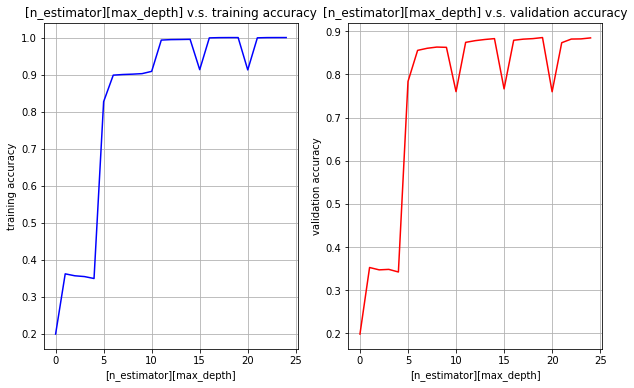

In [102]:
#plot max_depth vs acc_train using max_depth_list and acc_train_list
#plot max_depth vs acc_val using max_depth_list and acc_val_list
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(acc_train_list, 'b')
ax[0].set_xlabel('[n_estimator][max_depth]')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('[n_estimator][max_depth] v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(acc_val_list, 'r')
ax[1].set_xlabel('[n_estimator][max_depth]')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('[n_estimator][max_depth] v.s. validation accuracy')
ax[1].grid(True)

In [97]:
print('max validation accuracy is' ,max(acc_val_list))
print('row number is', np.argmax(acc_val_list))
print('Hyperparameters should be: estimator=81, max_depth=31')

max validation accuracy is 0.8854879
row number is 19
Hyperparameters should be: estimator=81, max_depth=31


In [75]:
# RF with best hyperparameters
RF = RandomForestClassifier(n_estimators=81, max_depth=31, class_weight='balanced', random_state=0)

In [105]:
val_acc = weighted_accuracy(confusion_matrix(y_val, RF.predict(x_val)))
train_acc = weighted_accuracy(confusion_matrix(y_train, RF.predict(x_train)))
print('Train Accuracy for RandomForest is:', train_acc) # Some overfitting problem may happened
print('Validation Accuracy for RandomForest is:', val_acc)

Train Accuracy for RandomForest is: 1.0
Validation Accuracy for RandomForest is: 0.8846917


# Part3. MLP

In [133]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_26 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                650       
Total params: 283,850
Trainable params: 283,850
Non-trainable params: 0
_________________________________________________________________


In [129]:
# apply one-hot encoding to the training, validation, and test set
y_train = keras.utils.to_categorical(y_train, 10)
print(y_train.shape)
y_val = keras.utils.to_categorical(y_val, 10)
print(y_val.shape)

[2 1 1 ... 6 4 2]
(54000, 10)


In [134]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [135]:
for epoch in range(0, 30):   
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=64, epochs=1, validation_data=(x_val, y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])

epoch 0
Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - ETA: 4:13 - loss: 2.3026 - accuracy: 0.07 - ETA: 14s - loss: 2.3016 - accuracy: 0.1219 - ETA: 8s - loss: 2.3013 - accuracy: 0.113 - ETA: 6s - loss: 2.3008 - accuracy: 0.11 - ETA: 4s - loss: 2.3010 - accuracy: 0.11 - ETA: 4s - loss: 2.3007 - accuracy: 0.11 - ETA: 3s - loss: 2.3006 - accuracy: 0.11 - ETA: 3s - loss: 2.3004 - accuracy: 0.11 - ETA: 3s - loss: 2.3003 - accuracy: 0.11 - ETA: 2s - loss: 2.3002 - accuracy: 0.12 - ETA: 2s - loss: 2.3000 - accuracy: 0.11 - ETA: 2s - loss: 2.3000 - accuracy: 0.11 - ETA: 2s - loss: 2.3000 - accuracy: 0.12 - ETA: 2s - loss: 2.2999 - accuracy: 0.12 - ETA: 2s - loss: 2.3000 - accuracy: 0.12 - ETA: 1s - loss: 2.2999 - accuracy: 0.12 - ETA: 1s - loss: 2.2998 - accuracy: 0.12 - ETA: 1s - loss: 2.2997 - accuracy: 0.12 - ETA: 1s - loss: 2.2996 - accuracy: 0.12 - ETA: 1s - loss: 2.2996 - accuracy: 0.12 - ETA: 1s - loss: 2.2995 - accuracy: 0.12 - ETA: 1s 

54000/54000 [==============================] - ETA: 7s - loss: 1.0626 - accuracy: 0.60 - ETA: 2s - loss: 1.1922 - accuracy: 0.50 - ETA: 2s - loss: 1.2116 - accuracy: 0.50 - ETA: 2s - loss: 1.2568 - accuracy: 0.47 - ETA: 1s - loss: 1.3106 - accuracy: 0.46 - ETA: 1s - loss: 1.3234 - accuracy: 0.45 - ETA: 1s - loss: 1.2918 - accuracy: 0.47 - ETA: 1s - loss: 1.2752 - accuracy: 0.48 - ETA: 1s - loss: 1.2778 - accuracy: 0.47 - ETA: 1s - loss: 1.2642 - accuracy: 0.48 - ETA: 1s - loss: 1.2565 - accuracy: 0.48 - ETA: 1s - loss: 1.2432 - accuracy: 0.49 - ETA: 1s - loss: 1.2438 - accuracy: 0.48 - ETA: 1s - loss: 1.2411 - accuracy: 0.48 - ETA: 1s - loss: 1.2334 - accuracy: 0.49 - ETA: 1s - loss: 1.2240 - accuracy: 0.49 - ETA: 1s - loss: 1.2172 - accuracy: 0.49 - ETA: 1s - loss: 1.2107 - accuracy: 0.50 - ETA: 1s - loss: 1.2079 - accuracy: 0.50 - ETA: 1s - loss: 1.2025 - accuracy: 0.50 - ETA: 1s - loss: 1.1982 - accuracy: 0.50 - ETA: 1s - loss: 1.1917 - accuracy: 0.51 - ETA: 0s - loss: 1.1942 - accu

54000/54000 [==============================] - ETA: 8s - loss: 0.8705 - accuracy: 0.65 - ETA: 2s - loss: 1.0744 - accuracy: 0.56 - ETA: 2s - loss: 1.0992 - accuracy: 0.54 - ETA: 2s - loss: 1.0560 - accuracy: 0.56 - ETA: 2s - loss: 1.0322 - accuracy: 0.57 - ETA: 1s - loss: 1.0224 - accuracy: 0.58 - ETA: 1s - loss: 1.0339 - accuracy: 0.58 - ETA: 1s - loss: 1.0443 - accuracy: 0.57 - ETA: 1s - loss: 1.0282 - accuracy: 0.58 - ETA: 1s - loss: 1.0236 - accuracy: 0.58 - ETA: 1s - loss: 1.0228 - accuracy: 0.58 - ETA: 1s - loss: 1.0185 - accuracy: 0.58 - ETA: 1s - loss: 1.0136 - accuracy: 0.58 - ETA: 1s - loss: 1.0076 - accuracy: 0.59 - ETA: 1s - loss: 1.0000 - accuracy: 0.59 - ETA: 1s - loss: 1.0181 - accuracy: 0.58 - ETA: 1s - loss: 1.0228 - accuracy: 0.58 - ETA: 1s - loss: 1.0171 - accuracy: 0.58 - ETA: 1s - loss: 1.0104 - accuracy: 0.59 - ETA: 1s - loss: 1.0049 - accuracy: 0.59 - ETA: 1s - loss: 1.0017 - accuracy: 0.59 - ETA: 1s - loss: 1.0014 - accuracy: 0.59 - ETA: 1s - loss: 0.9976 - accu

54000/54000 [==============================] - ETA: 7s - loss: 0.8347 - accuracy: 0.68 - ETA: 2s - loss: 0.7878 - accuracy: 0.70 - ETA: 2s - loss: 0.8264 - accuracy: 0.69 - ETA: 2s - loss: 0.9160 - accuracy: 0.65 - ETA: 2s - loss: 0.9095 - accuracy: 0.65 - ETA: 2s - loss: 0.8988 - accuracy: 0.66 - ETA: 1s - loss: 0.8910 - accuracy: 0.66 - ETA: 1s - loss: 0.8841 - accuracy: 0.66 - ETA: 1s - loss: 0.8871 - accuracy: 0.65 - ETA: 1s - loss: 0.8912 - accuracy: 0.65 - ETA: 1s - loss: 0.8925 - accuracy: 0.65 - ETA: 1s - loss: 0.8890 - accuracy: 0.65 - ETA: 1s - loss: 0.8883 - accuracy: 0.65 - ETA: 1s - loss: 0.8875 - accuracy: 0.65 - ETA: 1s - loss: 0.8885 - accuracy: 0.65 - ETA: 1s - loss: 0.8875 - accuracy: 0.65 - ETA: 1s - loss: 0.8835 - accuracy: 0.65 - ETA: 1s - loss: 0.8842 - accuracy: 0.65 - ETA: 1s - loss: 0.8892 - accuracy: 0.65 - ETA: 1s - loss: 0.8894 - accuracy: 0.65 - ETA: 1s - loss: 0.8911 - accuracy: 0.65 - ETA: 1s - loss: 0.8880 - accuracy: 0.65 - ETA: 1s - loss: 0.8872 - accu

54000/54000 [==============================] - ETA: 8s - loss: 0.5123 - accuracy: 0.79 - ETA: 2s - loss: 0.7427 - accuracy: 0.69 - ETA: 2s - loss: 0.7850 - accuracy: 0.68 - ETA: 2s - loss: 0.7814 - accuracy: 0.69 - ETA: 2s - loss: 0.7973 - accuracy: 0.68 - ETA: 1s - loss: 0.7938 - accuracy: 0.68 - ETA: 1s - loss: 0.7930 - accuracy: 0.69 - ETA: 1s - loss: 0.7899 - accuracy: 0.69 - ETA: 1s - loss: 0.7853 - accuracy: 0.69 - ETA: 1s - loss: 0.7860 - accuracy: 0.69 - ETA: 1s - loss: 0.7890 - accuracy: 0.69 - ETA: 1s - loss: 0.8043 - accuracy: 0.68 - ETA: 1s - loss: 0.8099 - accuracy: 0.68 - ETA: 1s - loss: 0.8061 - accuracy: 0.68 - ETA: 1s - loss: 0.8041 - accuracy: 0.68 - ETA: 1s - loss: 0.8079 - accuracy: 0.68 - ETA: 1s - loss: 0.8083 - accuracy: 0.68 - ETA: 1s - loss: 0.8060 - accuracy: 0.68 - ETA: 1s - loss: 0.8000 - accuracy: 0.68 - ETA: 1s - loss: 0.7952 - accuracy: 0.69 - ETA: 1s - loss: 0.7901 - accuracy: 0.69 - ETA: 1s - loss: 0.7889 - accuracy: 0.69 - ETA: 1s - loss: 0.7867 - accu

54000/54000 [==============================] - ETA: 7s - loss: 0.7525 - accuracy: 0.70 - ETA: 2s - loss: 0.6638 - accuracy: 0.74 - ETA: 2s - loss: 0.7067 - accuracy: 0.72 - ETA: 2s - loss: 0.7051 - accuracy: 0.72 - ETA: 2s - loss: 0.7109 - accuracy: 0.72 - ETA: 2s - loss: 0.7061 - accuracy: 0.72 - ETA: 2s - loss: 0.7045 - accuracy: 0.72 - ETA: 1s - loss: 0.7275 - accuracy: 0.71 - ETA: 1s - loss: 0.7301 - accuracy: 0.71 - ETA: 1s - loss: 0.7253 - accuracy: 0.71 - ETA: 1s - loss: 0.7233 - accuracy: 0.71 - ETA: 1s - loss: 0.7267 - accuracy: 0.71 - ETA: 1s - loss: 0.7237 - accuracy: 0.72 - ETA: 1s - loss: 0.7217 - accuracy: 0.72 - ETA: 1s - loss: 0.7204 - accuracy: 0.72 - ETA: 1s - loss: 0.7257 - accuracy: 0.71 - ETA: 1s - loss: 0.7271 - accuracy: 0.71 - ETA: 1s - loss: 0.7279 - accuracy: 0.71 - ETA: 1s - loss: 0.7289 - accuracy: 0.71 - ETA: 1s - loss: 0.7296 - accuracy: 0.71 - ETA: 1s - loss: 0.7301 - accuracy: 0.71 - ETA: 1s - loss: 0.7287 - accuracy: 0.71 - ETA: 1s - loss: 0.7257 - accu

54000/54000 [==============================] - ETA: 7s - loss: 0.6619 - accuracy: 0.81 - ETA: 2s - loss: 0.6217 - accuracy: 0.75 - ETA: 2s - loss: 0.6314 - accuracy: 0.75 - ETA: 2s - loss: 0.6546 - accuracy: 0.75 - ETA: 2s - loss: 0.6574 - accuracy: 0.75 - ETA: 2s - loss: 0.6723 - accuracy: 0.74 - ETA: 2s - loss: 0.6648 - accuracy: 0.74 - ETA: 2s - loss: 0.6873 - accuracy: 0.73 - ETA: 2s - loss: 0.6930 - accuracy: 0.73 - ETA: 2s - loss: 0.6969 - accuracy: 0.73 - ETA: 1s - loss: 0.7002 - accuracy: 0.73 - ETA: 1s - loss: 0.6943 - accuracy: 0.73 - ETA: 1s - loss: 0.6921 - accuracy: 0.73 - ETA: 1s - loss: 0.6867 - accuracy: 0.73 - ETA: 1s - loss: 0.6825 - accuracy: 0.73 - ETA: 1s - loss: 0.6818 - accuracy: 0.73 - ETA: 1s - loss: 0.6818 - accuracy: 0.73 - ETA: 1s - loss: 0.6853 - accuracy: 0.73 - ETA: 1s - loss: 0.6876 - accuracy: 0.73 - ETA: 1s - loss: 0.6924 - accuracy: 0.73 - ETA: 1s - loss: 0.6936 - accuracy: 0.73 - ETA: 1s - loss: 0.6922 - accuracy: 0.73 - ETA: 1s - loss: 0.6917 - accu

54000/54000 [==============================] - ETA: 8s - loss: 0.4968 - accuracy: 0.81 - ETA: 2s - loss: 0.6608 - accuracy: 0.73 - ETA: 2s - loss: 0.6678 - accuracy: 0.74 - ETA: 2s - loss: 0.6690 - accuracy: 0.74 - ETA: 2s - loss: 0.6533 - accuracy: 0.75 - ETA: 2s - loss: 0.6811 - accuracy: 0.73 - ETA: 2s - loss: 0.6789 - accuracy: 0.73 - ETA: 1s - loss: 0.6755 - accuracy: 0.73 - ETA: 1s - loss: 0.6762 - accuracy: 0.73 - ETA: 1s - loss: 0.6775 - accuracy: 0.73 - ETA: 1s - loss: 0.6701 - accuracy: 0.74 - ETA: 1s - loss: 0.6698 - accuracy: 0.74 - ETA: 1s - loss: 0.6700 - accuracy: 0.74 - ETA: 1s - loss: 0.6680 - accuracy: 0.74 - ETA: 1s - loss: 0.6692 - accuracy: 0.74 - ETA: 1s - loss: 0.6641 - accuracy: 0.74 - ETA: 1s - loss: 0.6679 - accuracy: 0.74 - ETA: 1s - loss: 0.6664 - accuracy: 0.74 - ETA: 1s - loss: 0.6669 - accuracy: 0.74 - ETA: 1s - loss: 0.6687 - accuracy: 0.74 - ETA: 1s - loss: 0.6703 - accuracy: 0.74 - ETA: 1s - loss: 0.6695 - accuracy: 0.74 - ETA: 1s - loss: 0.6679 - accu

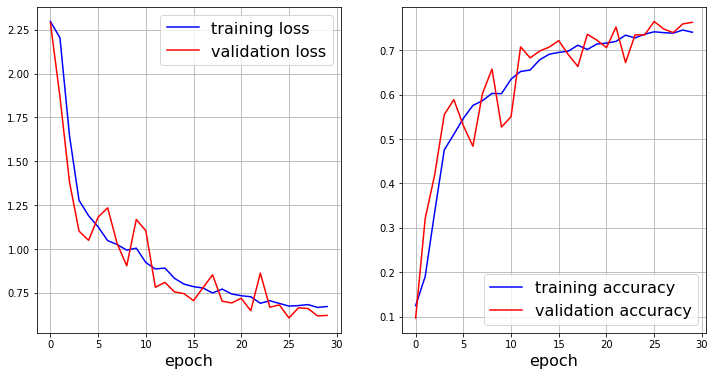

In [137]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

In [140]:
# train
score = model.evaluate(x_train, y_train, batch_size=64, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
# validation
score = model.evaluate(x_val, y_val, batch_size=64, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Train loss: 0.6150930212338765
Train accuracy: 0.76485187
Val loss: 0.6214359707832336
Val accuracy: 0.76266664


# Part4. 2D-CNN

In [156]:
x_train = x_train.reshape(54000,28,28,1)
x_val = x_val.reshape(6000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [170]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
cnn = Sequential()
# convolutional layer: extract features from image
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
# pooling layer: reduce the volume of input
cnn.add(MaxPooling2D(pool_size=2, strides=2))
# Flatten
cnn.add(Flatten())
# fully connected layer: convert from a layer to another
cnn.add(Dense(units=16, activation='relu'))
# Output
cnn.add(Dense(units=10, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                86544     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                170       
Total params: 87,034
Trainable params: 87,034
Non-trainable params: 0
_________________________________________________________________


In [171]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]
for epoch in range(0, 30):   
    print('epoch', epoch)
    #set epochs=1
    history=cnn.fit(x_train, y_train, epochs = 1, validation_data=(x_val, y_val), batch_size=64)
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])

epoch 0
Train on 54000 samples, validate on 6000 samples


36864/54000 [===================>..........] - ETA: 6:27 - loss: 0.3251 - accuracy: 0.90 - ETA: 1:47 - loss: 0.3250 - accuracy: 0.90 - ETA: 1:00 - loss: 0.3251 - accuracy: 0.90 - ETA: 44s - loss: 0.3251 - accuracy: 0.9000 - ETA: 38s - loss: 0.3250 - accuracy: 0.900 - ETA: 34s - loss: 0.3250 - accuracy: 0.900 - ETA: 31s - loss: 0.3250 - accuracy: 0.900 - ETA: 29s - loss: 0.3250 - accuracy: 0.900 - ETA: 26s - loss: 0.3250 - accuracy: 0.900 - ETA: 24s - loss: 0.3251 - accuracy: 0.900 - ETA: 23s - loss: 0.3250 - accuracy: 0.900 - ETA: 22s - loss: 0.3250 - accuracy: 0.900 - ETA: 22s - loss: 0.3250 - accuracy: 0.900 - ETA: 21s - loss: 0.3250 - accuracy: 0.900 - ETA: 21s - loss: 0.3250 - accuracy: 0.900 - ETA: 20s - loss: 0.3249 - accuracy: 0.900 - ETA: 20s - loss: 0.3249 - accuracy: 0.900 - ETA: 19s - loss: 0.3249 - accuracy: 0.900 - ETA: 19s - loss: 0.3248 - accuracy: 0.900 - ETA: 18s - loss: 0.3248 - accuracy: 0.900 - ETA: 18s - loss: 0.3248 - accuracy: 0.900 - ETA: 18s - loss: 0.3248 - ac

54000/54000 [==============================] - ETA: 4s - loss: 0.2580 - accuracy: 0.90 - ETA: 4s - loss: 0.2577 - accuracy: 0.90 - ETA: 4s - loss: 0.2573 - accuracy: 0.90 - ETA: 4s - loss: 0.2569 - accuracy: 0.90 - ETA: 4s - loss: 0.2565 - accuracy: 0.90 - ETA: 4s - loss: 0.2562 - accuracy: 0.90 - ETA: 4s - loss: 0.2559 - accuracy: 0.90 - ETA: 4s - loss: 0.2555 - accuracy: 0.90 - ETA: 4s - loss: 0.2551 - accuracy: 0.90 - ETA: 4s - loss: 0.2548 - accuracy: 0.90 - ETA: 4s - loss: 0.2544 - accuracy: 0.90 - ETA: 4s - loss: 0.2541 - accuracy: 0.90 - ETA: 4s - loss: 0.2537 - accuracy: 0.90 - ETA: 4s - loss: 0.2534 - accuracy: 0.90 - ETA: 4s - loss: 0.2530 - accuracy: 0.90 - ETA: 4s - loss: 0.2527 - accuracy: 0.90 - ETA: 3s - loss: 0.2524 - accuracy: 0.90 - ETA: 3s - loss: 0.2521 - accuracy: 0.90 - ETA: 3s - loss: 0.2518 - accuracy: 0.90 - ETA: 3s - loss: 0.2514 - accuracy: 0.90 - ETA: 3s - loss: 0.2510 - accuracy: 0.90 - ETA: 3s - loss: 0.2507 - accuracy: 0.90 - ETA: 3s - loss: 0.2503 - accu

38656/54000 [====================>.........] - ETA: 22s - loss: 0.1860 - accuracy: 0.925 - ETA: 16s - loss: 0.1749 - accuracy: 0.927 - ETA: 15s - loss: 0.1724 - accuracy: 0.928 - ETA: 14s - loss: 0.1751 - accuracy: 0.927 - ETA: 14s - loss: 0.1701 - accuracy: 0.929 - ETA: 14s - loss: 0.1692 - accuracy: 0.931 - ETA: 14s - loss: 0.1676 - accuracy: 0.932 - ETA: 14s - loss: 0.1681 - accuracy: 0.931 - ETA: 14s - loss: 0.1665 - accuracy: 0.931 - ETA: 14s - loss: 0.1671 - accuracy: 0.931 - ETA: 14s - loss: 0.1676 - accuracy: 0.931 - ETA: 14s - loss: 0.1674 - accuracy: 0.930 - ETA: 13s - loss: 0.1676 - accuracy: 0.930 - ETA: 13s - loss: 0.1671 - accuracy: 0.930 - ETA: 13s - loss: 0.1667 - accuracy: 0.930 - ETA: 13s - loss: 0.1655 - accuracy: 0.931 - ETA: 13s - loss: 0.1656 - accuracy: 0.931 - ETA: 13s - loss: 0.1654 - accuracy: 0.931 - ETA: 13s - loss: 0.1653 - accuracy: 0.931 - ETA: 13s - loss: 0.1651 - accuracy: 0.931 - ETA: 13s - loss: 0.1653 - accuracy: 0.931 - ETA: 13s - loss: 0.1652 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1562 - accuracy: 0.93 - ETA: 4s - loss: 0.1563 - accuracy: 0.93 - ETA: 3s - loss: 0.1562 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1561 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1561 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1561 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1560 - accuracy: 0.93 - ETA: 3s - loss: 0.1559 - accuracy: 0.93 - ETA: 3s - loss: 0.1559 - accuracy: 0.93 - ETA: 3s - loss: 0.1559 - accuracy: 0.93 - ETA: 3s - loss: 0.1558 - accuracy: 0.93 - ETA: 3s - loss: 0.1557 - accuracy: 0.93 - ETA: 2s - loss: 0.1557 - accuracy: 0.93 - ETA: 2s - loss: 0.1556 - accuracy: 0.93 - ETA: 2s - loss: 0.1555 - accu

37952/54000 [====================>.........] - ETA: 19s - loss: 0.1385 - accuracy: 0.946 - ETA: 15s - loss: 0.1405 - accuracy: 0.943 - ETA: 15s - loss: 0.1372 - accuracy: 0.944 - ETA: 14s - loss: 0.1375 - accuracy: 0.944 - ETA: 14s - loss: 0.1365 - accuracy: 0.943 - ETA: 14s - loss: 0.1381 - accuracy: 0.942 - ETA: 14s - loss: 0.1364 - accuracy: 0.943 - ETA: 14s - loss: 0.1360 - accuracy: 0.943 - ETA: 14s - loss: 0.1358 - accuracy: 0.943 - ETA: 14s - loss: 0.1348 - accuracy: 0.944 - ETA: 14s - loss: 0.1367 - accuracy: 0.944 - ETA: 14s - loss: 0.1375 - accuracy: 0.943 - ETA: 14s - loss: 0.1385 - accuracy: 0.943 - ETA: 14s - loss: 0.1386 - accuracy: 0.943 - ETA: 14s - loss: 0.1392 - accuracy: 0.942 - ETA: 13s - loss: 0.1388 - accuracy: 0.942 - ETA: 13s - loss: 0.1386 - accuracy: 0.942 - ETA: 13s - loss: 0.1377 - accuracy: 0.942 - ETA: 13s - loss: 0.1383 - accuracy: 0.942 - ETA: 13s - loss: 0.1386 - accuracy: 0.942 - ETA: 13s - loss: 0.1382 - accuracy: 0.942 - ETA: 13s - loss: 0.1379 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1358 - accuracy: 0.94 - ETA: 4s - loss: 0.1357 - accuracy: 0.94 - ETA: 4s - loss: 0.1356 - accuracy: 0.94 - ETA: 4s - loss: 0.1356 - accuracy: 0.94 - ETA: 4s - loss: 0.1355 - accuracy: 0.94 - ETA: 4s - loss: 0.1354 - accuracy: 0.94 - ETA: 3s - loss: 0.1353 - accuracy: 0.94 - ETA: 3s - loss: 0.1353 - accuracy: 0.94 - ETA: 3s - loss: 0.1353 - accuracy: 0.94 - ETA: 3s - loss: 0.1352 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1349 - accuracy: 0.94 - ETA: 3s - loss: 0.1349 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1349 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1350 - accuracy: 0.94 - ETA: 3s - loss: 0.1349 - accu

37952/54000 [====================>.........] - ETA: 21s - loss: 0.0922 - accuracy: 0.971 - ETA: 15s - loss: 0.1331 - accuracy: 0.948 - ETA: 15s - loss: 0.1315 - accuracy: 0.948 - ETA: 15s - loss: 0.1299 - accuracy: 0.948 - ETA: 14s - loss: 0.1313 - accuracy: 0.947 - ETA: 14s - loss: 0.1278 - accuracy: 0.949 - ETA: 14s - loss: 0.1267 - accuracy: 0.948 - ETA: 14s - loss: 0.1261 - accuracy: 0.948 - ETA: 14s - loss: 0.1271 - accuracy: 0.948 - ETA: 14s - loss: 0.1276 - accuracy: 0.948 - ETA: 14s - loss: 0.1275 - accuracy: 0.948 - ETA: 14s - loss: 0.1285 - accuracy: 0.947 - ETA: 14s - loss: 0.1273 - accuracy: 0.948 - ETA: 14s - loss: 0.1263 - accuracy: 0.949 - ETA: 14s - loss: 0.1258 - accuracy: 0.949 - ETA: 14s - loss: 0.1263 - accuracy: 0.950 - ETA: 14s - loss: 0.1263 - accuracy: 0.949 - ETA: 13s - loss: 0.1264 - accuracy: 0.950 - ETA: 13s - loss: 0.1267 - accuracy: 0.950 - ETA: 13s - loss: 0.1262 - accuracy: 0.950 - ETA: 13s - loss: 0.1263 - accuracy: 0.950 - ETA: 13s - loss: 0.1253 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1232 - accuracy: 0.95 - ETA: 4s - loss: 0.1231 - accuracy: 0.95 - ETA: 4s - loss: 0.1231 - accuracy: 0.95 - ETA: 4s - loss: 0.1231 - accuracy: 0.95 - ETA: 4s - loss: 0.1230 - accuracy: 0.95 - ETA: 4s - loss: 0.1230 - accuracy: 0.95 - ETA: 3s - loss: 0.1229 - accuracy: 0.95 - ETA: 3s - loss: 0.1228 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1226 - accuracy: 0.95 - ETA: 3s - loss: 0.1225 - accuracy: 0.95 - ETA: 3s - loss: 0.1225 - accuracy: 0.95 - ETA: 3s - loss: 0.1227 - accuracy: 0.95 - ETA: 3s - loss: 0.1226 - accuracy: 0.95 - ETA: 3s - loss: 0.1226 - accuracy: 0.95 - ETA: 3s - loss: 0.1226 - accuracy: 0.95 - ETA: 3s - loss: 0.1226 - accu

36864/54000 [===================>..........] - ETA: 19s - loss: 0.1136 - accuracy: 0.965 - ETA: 15s - loss: 0.1120 - accuracy: 0.957 - ETA: 15s - loss: 0.1116 - accuracy: 0.957 - ETA: 15s - loss: 0.1100 - accuracy: 0.955 - ETA: 14s - loss: 0.1144 - accuracy: 0.953 - ETA: 15s - loss: 0.1152 - accuracy: 0.952 - ETA: 14s - loss: 0.1155 - accuracy: 0.953 - ETA: 14s - loss: 0.1133 - accuracy: 0.954 - ETA: 14s - loss: 0.1151 - accuracy: 0.953 - ETA: 14s - loss: 0.1167 - accuracy: 0.953 - ETA: 14s - loss: 0.1157 - accuracy: 0.954 - ETA: 14s - loss: 0.1174 - accuracy: 0.953 - ETA: 14s - loss: 0.1174 - accuracy: 0.954 - ETA: 14s - loss: 0.1175 - accuracy: 0.954 - ETA: 14s - loss: 0.1163 - accuracy: 0.954 - ETA: 14s - loss: 0.1157 - accuracy: 0.955 - ETA: 14s - loss: 0.1151 - accuracy: 0.955 - ETA: 14s - loss: 0.1148 - accuracy: 0.954 - ETA: 14s - loss: 0.1155 - accuracy: 0.954 - ETA: 14s - loss: 0.1152 - accuracy: 0.954 - ETA: 14s - loss: 0.1153 - accuracy: 0.954 - ETA: 14s - loss: 0.1149 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1161 - accuracy: 0.95 - ETA: 4s - loss: 0.1160 - accuracy: 0.95 - ETA: 4s - loss: 0.1160 - accuracy: 0.95 - ETA: 4s - loss: 0.1159 - accuracy: 0.95 - ETA: 4s - loss: 0.1158 - accuracy: 0.95 - ETA: 4s - loss: 0.1158 - accuracy: 0.95 - ETA: 4s - loss: 0.1158 - accuracy: 0.95 - ETA: 4s - loss: 0.1158 - accuracy: 0.95 - ETA: 4s - loss: 0.1157 - accuracy: 0.95 - ETA: 4s - loss: 0.1158 - accuracy: 0.95 - ETA: 4s - loss: 0.1157 - accuracy: 0.95 - ETA: 4s - loss: 0.1156 - accuracy: 0.95 - ETA: 4s - loss: 0.1157 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1159 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accuracy: 0.95 - ETA: 3s - loss: 0.1158 - accu

37312/54000 [===================>..........] - ETA: 18s - loss: 0.0882 - accuracy: 0.959 - ETA: 14s - loss: 0.1225 - accuracy: 0.954 - ETA: 14s - loss: 0.1160 - accuracy: 0.953 - ETA: 14s - loss: 0.1130 - accuracy: 0.953 - ETA: 14s - loss: 0.1150 - accuracy: 0.952 - ETA: 14s - loss: 0.1158 - accuracy: 0.952 - ETA: 14s - loss: 0.1145 - accuracy: 0.953 - ETA: 14s - loss: 0.1155 - accuracy: 0.952 - ETA: 14s - loss: 0.1143 - accuracy: 0.953 - ETA: 14s - loss: 0.1165 - accuracy: 0.952 - ETA: 14s - loss: 0.1166 - accuracy: 0.952 - ETA: 13s - loss: 0.1165 - accuracy: 0.952 - ETA: 13s - loss: 0.1164 - accuracy: 0.952 - ETA: 13s - loss: 0.1157 - accuracy: 0.953 - ETA: 13s - loss: 0.1141 - accuracy: 0.954 - ETA: 13s - loss: 0.1142 - accuracy: 0.954 - ETA: 13s - loss: 0.1154 - accuracy: 0.954 - ETA: 13s - loss: 0.1155 - accuracy: 0.953 - ETA: 13s - loss: 0.1162 - accuracy: 0.953 - ETA: 13s - loss: 0.1164 - accuracy: 0.953 - ETA: 13s - loss: 0.1163 - accuracy: 0.953 - ETA: 13s - loss: 0.1159 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1115 - accuracy: 0.95 - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1114 - accuracy: 0.95 - ETA: 4s - loss: 0.1113 - accuracy: 0.95 - ETA: 4s - loss: 0.1113 - accuracy: 0.95 - ETA: 3s - loss: 0.1114 - accuracy: 0.95 - ETA: 3s - loss: 0.1113 - accuracy: 0.95 - ETA: 3s - loss: 0.1113 - accuracy: 0.95 - ETA: 3s - loss: 0.1113 - accuracy: 0.95 - ETA: 3s - loss: 0.1112 - accuracy: 0.95 - ETA: 3s - loss: 0.1112 - accuracy: 0.95 - ETA: 3s - loss: 0.1112 - accuracy: 0.95 - ETA: 3s - loss: 0.1112 - accuracy: 0.95 - ETA: 3s - loss: 0.1111 - accuracy: 0.95 - ETA: 3s - loss: 0.1110 - accuracy: 0.95 - ETA: 3s - loss: 0.1110 - accuracy: 0.95 - ETA: 3s - loss: 0.1110 - accuracy: 0.95 - ETA: 3s - loss: 0.1109 - accuracy: 0.95 - ETA: 3s - loss: 0.1109 - accu

36992/54000 [===================>..........] - ETA: 19s - loss: 0.1394 - accuracy: 0.943 - ETA: 15s - loss: 0.1327 - accuracy: 0.949 - ETA: 14s - loss: 0.1207 - accuracy: 0.954 - ETA: 14s - loss: 0.1134 - accuracy: 0.954 - ETA: 14s - loss: 0.1102 - accuracy: 0.956 - ETA: 14s - loss: 0.1085 - accuracy: 0.955 - ETA: 14s - loss: 0.1067 - accuracy: 0.956 - ETA: 14s - loss: 0.1017 - accuracy: 0.959 - ETA: 14s - loss: 0.1046 - accuracy: 0.958 - ETA: 14s - loss: 0.1060 - accuracy: 0.957 - ETA: 14s - loss: 0.1069 - accuracy: 0.957 - ETA: 14s - loss: 0.1067 - accuracy: 0.957 - ETA: 14s - loss: 0.1071 - accuracy: 0.957 - ETA: 13s - loss: 0.1077 - accuracy: 0.956 - ETA: 13s - loss: 0.1077 - accuracy: 0.956 - ETA: 13s - loss: 0.1078 - accuracy: 0.957 - ETA: 13s - loss: 0.1083 - accuracy: 0.956 - ETA: 13s - loss: 0.1080 - accuracy: 0.956 - ETA: 13s - loss: 0.1073 - accuracy: 0.956 - ETA: 13s - loss: 0.1068 - accuracy: 0.956 - ETA: 13s - loss: 0.1068 - accuracy: 0.956 - ETA: 13s - loss: 0.1065 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1044 - accuracy: 0.95 - ETA: 4s - loss: 0.1044 - accuracy: 0.95 - ETA: 4s - loss: 0.1044 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1042 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 4s - loss: 0.1043 - accuracy: 0.95 - ETA: 3s - loss: 0.1043 - accuracy: 0.95 - ETA: 3s - loss: 0.1043 - accuracy: 0.95 - ETA: 3s - loss: 0.1042 - accuracy: 0.95 - ETA: 3s - loss: 0.1042 - accuracy: 0.95 - ETA: 3s - loss: 0.1042 - accuracy: 0.95 - ETA: 3s - loss: 0.1041 - accuracy: 0.95 - ETA: 3s - loss: 0.1040 - accuracy: 0.95 - ETA: 3s - loss: 0.1040 - accuracy: 0.95 - ETA: 3s - loss: 0.1039 - accuracy: 0.95 - ETA: 3s - loss: 0.1039 - accuracy: 0.95 - ETA: 3s - loss: 0.1040 - accuracy: 0.95 - ETA: 3s - loss: 0.1040 - accu

37376/54000 [===================>..........] - ETA: 19s - loss: 0.0827 - accuracy: 0.965 - ETA: 15s - loss: 0.1015 - accuracy: 0.952 - ETA: 15s - loss: 0.1049 - accuracy: 0.955 - ETA: 15s - loss: 0.1003 - accuracy: 0.959 - ETA: 14s - loss: 0.1007 - accuracy: 0.959 - ETA: 14s - loss: 0.0978 - accuracy: 0.960 - ETA: 14s - loss: 0.0965 - accuracy: 0.960 - ETA: 14s - loss: 0.0980 - accuracy: 0.959 - ETA: 14s - loss: 0.0993 - accuracy: 0.959 - ETA: 14s - loss: 0.0993 - accuracy: 0.959 - ETA: 14s - loss: 0.1001 - accuracy: 0.959 - ETA: 14s - loss: 0.1006 - accuracy: 0.959 - ETA: 14s - loss: 0.0999 - accuracy: 0.959 - ETA: 14s - loss: 0.0999 - accuracy: 0.959 - ETA: 13s - loss: 0.1002 - accuracy: 0.959 - ETA: 13s - loss: 0.1006 - accuracy: 0.959 - ETA: 13s - loss: 0.1009 - accuracy: 0.960 - ETA: 13s - loss: 0.1007 - accuracy: 0.960 - ETA: 13s - loss: 0.0999 - accuracy: 0.960 - ETA: 13s - loss: 0.1007 - accuracy: 0.960 - ETA: 13s - loss: 0.0999 - accuracy: 0.960 - ETA: 13s - loss: 0.0992 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0982 - accuracy: 0.96 - ETA: 4s - loss: 0.0982 - accuracy: 0.96 - ETA: 4s - loss: 0.0982 - accuracy: 0.96 - ETA: 4s - loss: 0.0984 - accuracy: 0.96 - ETA: 4s - loss: 0.0984 - accuracy: 0.96 - ETA: 4s - loss: 0.0984 - accuracy: 0.96 - ETA: 4s - loss: 0.0983 - accuracy: 0.96 - ETA: 4s - loss: 0.0984 - accuracy: 0.96 - ETA: 4s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0983 - accuracy: 0.96 - ETA: 3s - loss: 0.0983 - accuracy: 0.96 - ETA: 3s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.0986 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accuracy: 0.96 - ETA: 3s - loss: 0.0984 - accuracy: 0.96 - ETA: 3s - loss: 0.0985 - accu

36864/54000 [===================>..........] - ETA: 18s - loss: 0.0866 - accuracy: 0.967 - ETA: 15s - loss: 0.0923 - accuracy: 0.965 - ETA: 15s - loss: 0.0917 - accuracy: 0.963 - ETA: 15s - loss: 0.1002 - accuracy: 0.961 - ETA: 15s - loss: 0.0989 - accuracy: 0.961 - ETA: 14s - loss: 0.0983 - accuracy: 0.962 - ETA: 14s - loss: 0.0987 - accuracy: 0.961 - ETA: 14s - loss: 0.0983 - accuracy: 0.961 - ETA: 14s - loss: 0.0982 - accuracy: 0.961 - ETA: 14s - loss: 0.0996 - accuracy: 0.960 - ETA: 14s - loss: 0.1004 - accuracy: 0.960 - ETA: 14s - loss: 0.0998 - accuracy: 0.960 - ETA: 14s - loss: 0.0994 - accuracy: 0.960 - ETA: 14s - loss: 0.0982 - accuracy: 0.961 - ETA: 14s - loss: 0.0978 - accuracy: 0.961 - ETA: 14s - loss: 0.0977 - accuracy: 0.961 - ETA: 14s - loss: 0.0977 - accuracy: 0.961 - ETA: 14s - loss: 0.0984 - accuracy: 0.961 - ETA: 14s - loss: 0.0992 - accuracy: 0.960 - ETA: 13s - loss: 0.0989 - accuracy: 0.960 - ETA: 13s - loss: 0.0981 - accuracy: 0.960 - ETA: 13s - loss: 0.0984 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0959 - accuracy: 0.96 - ETA: 4s - loss: 0.0959 - accuracy: 0.96 - ETA: 4s - loss: 0.0959 - accuracy: 0.96 - ETA: 4s - loss: 0.0958 - accuracy: 0.96 - ETA: 4s - loss: 0.0959 - accuracy: 0.96 - ETA: 4s - loss: 0.0959 - accuracy: 0.96 - ETA: 4s - loss: 0.0958 - accuracy: 0.96 - ETA: 4s - loss: 0.0958 - accuracy: 0.96 - ETA: 4s - loss: 0.0957 - accuracy: 0.96 - ETA: 4s - loss: 0.0957 - accuracy: 0.96 - ETA: 4s - loss: 0.0957 - accuracy: 0.96 - ETA: 4s - loss: 0.0957 - accuracy: 0.96 - ETA: 4s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0958 - accuracy: 0.96 - ETA: 3s - loss: 0.0958 - accuracy: 0.96 - ETA: 3s - loss: 0.0958 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0957 - accuracy: 0.96 - ETA: 3s - loss: 0.0958 - accu

37440/54000 [===================>..........] - ETA: 20s - loss: 0.0819 - accuracy: 0.962 - ETA: 15s - loss: 0.0914 - accuracy: 0.959 - ETA: 15s - loss: 0.0928 - accuracy: 0.960 - ETA: 15s - loss: 0.0940 - accuracy: 0.959 - ETA: 15s - loss: 0.0927 - accuracy: 0.961 - ETA: 14s - loss: 0.0926 - accuracy: 0.961 - ETA: 14s - loss: 0.0936 - accuracy: 0.961 - ETA: 14s - loss: 0.0934 - accuracy: 0.961 - ETA: 14s - loss: 0.0939 - accuracy: 0.961 - ETA: 14s - loss: 0.0945 - accuracy: 0.960 - ETA: 14s - loss: 0.0938 - accuracy: 0.961 - ETA: 14s - loss: 0.0935 - accuracy: 0.961 - ETA: 14s - loss: 0.0941 - accuracy: 0.961 - ETA: 14s - loss: 0.0942 - accuracy: 0.961 - ETA: 14s - loss: 0.0946 - accuracy: 0.960 - ETA: 14s - loss: 0.0940 - accuracy: 0.961 - ETA: 13s - loss: 0.0945 - accuracy: 0.961 - ETA: 13s - loss: 0.0944 - accuracy: 0.961 - ETA: 13s - loss: 0.0939 - accuracy: 0.961 - ETA: 13s - loss: 0.0938 - accuracy: 0.961 - ETA: 13s - loss: 0.0933 - accuracy: 0.961 - ETA: 13s - loss: 0.0933 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0938 - accuracy: 0.96 - ETA: 4s - loss: 0.0938 - accuracy: 0.96 - ETA: 4s - loss: 0.0938 - accuracy: 0.96 - ETA: 4s - loss: 0.0937 - accuracy: 0.96 - ETA: 4s - loss: 0.0937 - accuracy: 0.96 - ETA: 4s - loss: 0.0936 - accuracy: 0.96 - ETA: 4s - loss: 0.0935 - accuracy: 0.96 - ETA: 4s - loss: 0.0934 - accuracy: 0.96 - ETA: 4s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0934 - accuracy: 0.96 - ETA: 3s - loss: 0.0934 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0934 - accuracy: 0.96 - ETA: 3s - loss: 0.0933 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accuracy: 0.96 - ETA: 3s - loss: 0.0935 - accu

36928/54000 [===================>..........] - ETA: 18s - loss: 0.0963 - accuracy: 0.953 - ETA: 15s - loss: 0.0927 - accuracy: 0.962 - ETA: 14s - loss: 0.0896 - accuracy: 0.963 - ETA: 14s - loss: 0.0851 - accuracy: 0.966 - ETA: 14s - loss: 0.0882 - accuracy: 0.965 - ETA: 14s - loss: 0.0884 - accuracy: 0.965 - ETA: 14s - loss: 0.0911 - accuracy: 0.964 - ETA: 14s - loss: 0.0921 - accuracy: 0.963 - ETA: 14s - loss: 0.0904 - accuracy: 0.964 - ETA: 14s - loss: 0.0922 - accuracy: 0.964 - ETA: 14s - loss: 0.0921 - accuracy: 0.964 - ETA: 14s - loss: 0.0905 - accuracy: 0.964 - ETA: 14s - loss: 0.0915 - accuracy: 0.964 - ETA: 14s - loss: 0.0911 - accuracy: 0.964 - ETA: 14s - loss: 0.0914 - accuracy: 0.964 - ETA: 14s - loss: 0.0911 - accuracy: 0.964 - ETA: 13s - loss: 0.0917 - accuracy: 0.964 - ETA: 13s - loss: 0.0921 - accuracy: 0.964 - ETA: 13s - loss: 0.0925 - accuracy: 0.964 - ETA: 13s - loss: 0.0927 - accuracy: 0.963 - ETA: 13s - loss: 0.0924 - accuracy: 0.963 - ETA: 13s - loss: 0.0923 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0914 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 4s - loss: 0.0914 - accuracy: 0.96 - ETA: 4s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0912 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0912 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0913 - accuracy: 0.96 - ETA: 3s - loss: 0.0914 - accuracy: 0.96 - ETA: 3s - loss: 0.0914 - accuracy: 0.96 - ETA: 3s - loss: 0.0914 - accu

36864/54000 [===================>..........] - ETA: 19s - loss: 0.0954 - accuracy: 0.964 - ETA: 15s - loss: 0.0823 - accuracy: 0.969 - ETA: 14s - loss: 0.0878 - accuracy: 0.967 - ETA: 14s - loss: 0.0806 - accuracy: 0.969 - ETA: 14s - loss: 0.0856 - accuracy: 0.967 - ETA: 14s - loss: 0.0853 - accuracy: 0.967 - ETA: 14s - loss: 0.0838 - accuracy: 0.967 - ETA: 14s - loss: 0.0842 - accuracy: 0.967 - ETA: 14s - loss: 0.0845 - accuracy: 0.967 - ETA: 14s - loss: 0.0861 - accuracy: 0.967 - ETA: 14s - loss: 0.0873 - accuracy: 0.966 - ETA: 14s - loss: 0.0877 - accuracy: 0.966 - ETA: 14s - loss: 0.0888 - accuracy: 0.966 - ETA: 14s - loss: 0.0891 - accuracy: 0.966 - ETA: 14s - loss: 0.0890 - accuracy: 0.966 - ETA: 13s - loss: 0.0886 - accuracy: 0.966 - ETA: 13s - loss: 0.0894 - accuracy: 0.965 - ETA: 13s - loss: 0.0890 - accuracy: 0.965 - ETA: 13s - loss: 0.0891 - accuracy: 0.965 - ETA: 13s - loss: 0.0900 - accuracy: 0.965 - ETA: 13s - loss: 0.0899 - accuracy: 0.965 - ETA: 13s - loss: 0.0903 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0896 - accuracy: 0.96 - ETA: 4s - loss: 0.0895 - accuracy: 0.96 - ETA: 4s - loss: 0.0896 - accuracy: 0.96 - ETA: 4s - loss: 0.0895 - accuracy: 0.96 - ETA: 4s - loss: 0.0897 - accuracy: 0.96 - ETA: 4s - loss: 0.0897 - accuracy: 0.96 - ETA: 4s - loss: 0.0898 - accuracy: 0.96 - ETA: 4s - loss: 0.0898 - accuracy: 0.96 - ETA: 4s - loss: 0.0898 - accuracy: 0.96 - ETA: 4s - loss: 0.0897 - accuracy: 0.96 - ETA: 4s - loss: 0.0897 - accuracy: 0.96 - ETA: 4s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0896 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0898 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accuracy: 0.96 - ETA: 3s - loss: 0.0897 - accu

36608/54000 [===================>..........] - ETA: 18s - loss: 0.0569 - accuracy: 0.982 - ETA: 15s - loss: 0.0790 - accuracy: 0.968 - ETA: 15s - loss: 0.0875 - accuracy: 0.967 - ETA: 15s - loss: 0.0893 - accuracy: 0.964 - ETA: 15s - loss: 0.0855 - accuracy: 0.966 - ETA: 14s - loss: 0.0902 - accuracy: 0.963 - ETA: 14s - loss: 0.0911 - accuracy: 0.963 - ETA: 14s - loss: 0.0903 - accuracy: 0.963 - ETA: 14s - loss: 0.0890 - accuracy: 0.964 - ETA: 14s - loss: 0.0913 - accuracy: 0.963 - ETA: 14s - loss: 0.0903 - accuracy: 0.963 - ETA: 14s - loss: 0.0887 - accuracy: 0.964 - ETA: 14s - loss: 0.0884 - accuracy: 0.964 - ETA: 14s - loss: 0.0883 - accuracy: 0.964 - ETA: 14s - loss: 0.0891 - accuracy: 0.964 - ETA: 14s - loss: 0.0899 - accuracy: 0.963 - ETA: 14s - loss: 0.0901 - accuracy: 0.963 - ETA: 14s - loss: 0.0905 - accuracy: 0.963 - ETA: 14s - loss: 0.0910 - accuracy: 0.963 - ETA: 13s - loss: 0.0916 - accuracy: 0.963 - ETA: 13s - loss: 0.0912 - accuracy: 0.963 - ETA: 13s - loss: 0.0911 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0881 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0881 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0880 - accuracy: 0.96 - ETA: 4s - loss: 0.0881 - accuracy: 0.96 - ETA: 4s - loss: 0.0883 - accuracy: 0.96 - ETA: 4s - loss: 0.0884 - accuracy: 0.96 - ETA: 3s - loss: 0.0884 - accuracy: 0.96 - ETA: 3s - loss: 0.0884 - accuracy: 0.96 - ETA: 3s - loss: 0.0885 - accuracy: 0.96 - ETA: 3s - loss: 0.0885 - accuracy: 0.96 - ETA: 3s - loss: 0.0885 - accuracy: 0.96 - ETA: 3s - loss: 0.0885 - accuracy: 0.96 - ETA: 3s - loss: 0.0884 - accuracy: 0.96 - ETA: 3s - loss: 0.0884 - accu

37440/54000 [===================>..........] - ETA: 17s - loss: 0.0937 - accuracy: 0.964 - ETA: 14s - loss: 0.0938 - accuracy: 0.963 - ETA: 14s - loss: 0.1003 - accuracy: 0.961 - ETA: 14s - loss: 0.1009 - accuracy: 0.959 - ETA: 14s - loss: 0.0957 - accuracy: 0.960 - ETA: 14s - loss: 0.0973 - accuracy: 0.960 - ETA: 14s - loss: 0.0961 - accuracy: 0.959 - ETA: 14s - loss: 0.0954 - accuracy: 0.960 - ETA: 14s - loss: 0.0952 - accuracy: 0.960 - ETA: 14s - loss: 0.0930 - accuracy: 0.961 - ETA: 14s - loss: 0.0926 - accuracy: 0.961 - ETA: 14s - loss: 0.0915 - accuracy: 0.962 - ETA: 14s - loss: 0.0909 - accuracy: 0.962 - ETA: 14s - loss: 0.0923 - accuracy: 0.962 - ETA: 13s - loss: 0.0917 - accuracy: 0.962 - ETA: 13s - loss: 0.0905 - accuracy: 0.963 - ETA: 14s - loss: 0.0895 - accuracy: 0.963 - ETA: 13s - loss: 0.0902 - accuracy: 0.963 - ETA: 13s - loss: 0.0901 - accuracy: 0.963 - ETA: 13s - loss: 0.0906 - accuracy: 0.963 - ETA: 13s - loss: 0.0912 - accuracy: 0.963 - ETA: 13s - loss: 0.0905 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0871 - accuracy: 0.96 - ETA: 4s - loss: 0.0872 - accuracy: 0.96 - ETA: 4s - loss: 0.0872 - accuracy: 0.96 - ETA: 4s - loss: 0.0873 - accuracy: 0.96 - ETA: 4s - loss: 0.0872 - accuracy: 0.96 - ETA: 4s - loss: 0.0871 - accuracy: 0.96 - ETA: 4s - loss: 0.0871 - accuracy: 0.96 - ETA: 4s - loss: 0.0871 - accuracy: 0.96 - ETA: 4s - loss: 0.0872 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0871 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accuracy: 0.96 - ETA: 3s - loss: 0.0870 - accu

37376/54000 [===================>..........] - ETA: 20s - loss: 0.0940 - accuracy: 0.968 - ETA: 15s - loss: 0.0913 - accuracy: 0.966 - ETA: 15s - loss: 0.0949 - accuracy: 0.964 - ETA: 15s - loss: 0.0951 - accuracy: 0.964 - ETA: 14s - loss: 0.0921 - accuracy: 0.965 - ETA: 14s - loss: 0.0936 - accuracy: 0.964 - ETA: 14s - loss: 0.0932 - accuracy: 0.964 - ETA: 14s - loss: 0.0932 - accuracy: 0.963 - ETA: 14s - loss: 0.0920 - accuracy: 0.964 - ETA: 14s - loss: 0.0926 - accuracy: 0.964 - ETA: 14s - loss: 0.0923 - accuracy: 0.964 - ETA: 14s - loss: 0.0922 - accuracy: 0.963 - ETA: 13s - loss: 0.0917 - accuracy: 0.963 - ETA: 13s - loss: 0.0913 - accuracy: 0.964 - ETA: 13s - loss: 0.0922 - accuracy: 0.963 - ETA: 13s - loss: 0.0910 - accuracy: 0.963 - ETA: 13s - loss: 0.0919 - accuracy: 0.963 - ETA: 13s - loss: 0.0920 - accuracy: 0.963 - ETA: 13s - loss: 0.0918 - accuracy: 0.963 - ETA: 13s - loss: 0.0919 - accuracy: 0.963 - ETA: 13s - loss: 0.0909 - accuracy: 0.963 - ETA: 13s - loss: 0.0901 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0863 - accuracy: 0.96 - ETA: 4s - loss: 0.0862 - accuracy: 0.96 - ETA: 4s - loss: 0.0862 - accuracy: 0.96 - ETA: 4s - loss: 0.0863 - accuracy: 0.96 - ETA: 4s - loss: 0.0863 - accuracy: 0.96 - ETA: 4s - loss: 0.0863 - accuracy: 0.96 - ETA: 4s - loss: 0.0862 - accuracy: 0.96 - ETA: 4s - loss: 0.0862 - accuracy: 0.96 - ETA: 4s - loss: 0.0862 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accuracy: 0.96 - ETA: 3s - loss: 0.0862 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0860 - accuracy: 0.96 - ETA: 3s - loss: 0.0861 - accu

37440/54000 [===================>..........] - ETA: 20s - loss: 0.0823 - accuracy: 0.967 - ETA: 16s - loss: 0.0773 - accuracy: 0.970 - ETA: 15s - loss: 0.0887 - accuracy: 0.968 - ETA: 15s - loss: 0.0840 - accuracy: 0.969 - ETA: 15s - loss: 0.0820 - accuracy: 0.969 - ETA: 14s - loss: 0.0825 - accuracy: 0.968 - ETA: 14s - loss: 0.0795 - accuracy: 0.969 - ETA: 14s - loss: 0.0807 - accuracy: 0.969 - ETA: 14s - loss: 0.0828 - accuracy: 0.968 - ETA: 14s - loss: 0.0836 - accuracy: 0.967 - ETA: 14s - loss: 0.0844 - accuracy: 0.967 - ETA: 14s - loss: 0.0840 - accuracy: 0.967 - ETA: 14s - loss: 0.0845 - accuracy: 0.967 - ETA: 14s - loss: 0.0849 - accuracy: 0.966 - ETA: 14s - loss: 0.0845 - accuracy: 0.966 - ETA: 14s - loss: 0.0845 - accuracy: 0.966 - ETA: 14s - loss: 0.0844 - accuracy: 0.966 - ETA: 14s - loss: 0.0850 - accuracy: 0.966 - ETA: 13s - loss: 0.0851 - accuracy: 0.966 - ETA: 13s - loss: 0.0843 - accuracy: 0.966 - ETA: 13s - loss: 0.0851 - accuracy: 0.965 - ETA: 13s - loss: 0.0858 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0849 - accuracy: 0.96 - ETA: 4s - loss: 0.0849 - accuracy: 0.96 - ETA: 4s - loss: 0.0850 - accuracy: 0.96 - ETA: 4s - loss: 0.0852 - accuracy: 0.96 - ETA: 4s - loss: 0.0851 - accuracy: 0.96 - ETA: 4s - loss: 0.0851 - accuracy: 0.96 - ETA: 4s - loss: 0.0849 - accuracy: 0.96 - ETA: 4s - loss: 0.0850 - accuracy: 0.96 - ETA: 4s - loss: 0.0849 - accuracy: 0.96 - ETA: 3s - loss: 0.0849 - accuracy: 0.96 - ETA: 3s - loss: 0.0849 - accuracy: 0.96 - ETA: 3s - loss: 0.0850 - accuracy: 0.96 - ETA: 3s - loss: 0.0850 - accuracy: 0.96 - ETA: 3s - loss: 0.0849 - accuracy: 0.96 - ETA: 3s - loss: 0.0850 - accuracy: 0.96 - ETA: 3s - loss: 0.0850 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0851 - accuracy: 0.96 - ETA: 3s - loss: 0.0852 - accu

36864/54000 [===================>..........] - ETA: 20s - loss: 0.0852 - accuracy: 0.973 - ETA: 15s - loss: 0.0776 - accuracy: 0.971 - ETA: 15s - loss: 0.0924 - accuracy: 0.966 - ETA: 15s - loss: 0.0908 - accuracy: 0.966 - ETA: 15s - loss: 0.0920 - accuracy: 0.963 - ETA: 14s - loss: 0.0924 - accuracy: 0.963 - ETA: 14s - loss: 0.0919 - accuracy: 0.963 - ETA: 14s - loss: 0.0917 - accuracy: 0.962 - ETA: 14s - loss: 0.0919 - accuracy: 0.963 - ETA: 14s - loss: 0.0939 - accuracy: 0.962 - ETA: 14s - loss: 0.0924 - accuracy: 0.963 - ETA: 14s - loss: 0.0909 - accuracy: 0.964 - ETA: 14s - loss: 0.0901 - accuracy: 0.964 - ETA: 14s - loss: 0.0904 - accuracy: 0.964 - ETA: 14s - loss: 0.0893 - accuracy: 0.964 - ETA: 14s - loss: 0.0901 - accuracy: 0.964 - ETA: 14s - loss: 0.0906 - accuracy: 0.963 - ETA: 14s - loss: 0.0899 - accuracy: 0.964 - ETA: 14s - loss: 0.0891 - accuracy: 0.964 - ETA: 14s - loss: 0.0889 - accuracy: 0.964 - ETA: 14s - loss: 0.0877 - accuracy: 0.965 - ETA: 13s - loss: 0.0872 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0838 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0838 - accuracy: 0.96 - ETA: 4s - loss: 0.0838 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 3s - loss: 0.0836 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0836 - accuracy: 0.96 - ETA: 3s - loss: 0.0836 - accuracy: 0.96 - ETA: 3s - loss: 0.0836 - accuracy: 0.96 - ETA: 3s - loss: 0.0836 - accu

36864/54000 [===================>..........] - ETA: 20s - loss: 0.0841 - accuracy: 0.967 - ETA: 15s - loss: 0.0932 - accuracy: 0.963 - ETA: 15s - loss: 0.0880 - accuracy: 0.965 - ETA: 15s - loss: 0.0883 - accuracy: 0.964 - ETA: 15s - loss: 0.0923 - accuracy: 0.964 - ETA: 14s - loss: 0.0917 - accuracy: 0.965 - ETA: 14s - loss: 0.0911 - accuracy: 0.965 - ETA: 14s - loss: 0.0929 - accuracy: 0.964 - ETA: 14s - loss: 0.0908 - accuracy: 0.965 - ETA: 14s - loss: 0.0900 - accuracy: 0.965 - ETA: 14s - loss: 0.0894 - accuracy: 0.966 - ETA: 14s - loss: 0.0893 - accuracy: 0.965 - ETA: 14s - loss: 0.0886 - accuracy: 0.966 - ETA: 14s - loss: 0.0891 - accuracy: 0.965 - ETA: 14s - loss: 0.0878 - accuracy: 0.966 - ETA: 14s - loss: 0.0869 - accuracy: 0.966 - ETA: 13s - loss: 0.0861 - accuracy: 0.966 - ETA: 13s - loss: 0.0868 - accuracy: 0.966 - ETA: 13s - loss: 0.0861 - accuracy: 0.966 - ETA: 13s - loss: 0.0862 - accuracy: 0.966 - ETA: 13s - loss: 0.0864 - accuracy: 0.966 - ETA: 13s - loss: 0.0869 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0840 - accuracy: 0.96 - ETA: 4s - loss: 0.0842 - accuracy: 0.96 - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0840 - accuracy: 0.96 - ETA: 4s - loss: 0.0841 - accuracy: 0.96 - ETA: 4s - loss: 0.0840 - accuracy: 0.96 - ETA: 4s - loss: 0.0840 - accuracy: 0.96 - ETA: 4s - loss: 0.0840 - accuracy: 0.96 - ETA: 4s - loss: 0.0839 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0837 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accuracy: 0.96 - ETA: 3s - loss: 0.0838 - accu

36416/54000 [===================>..........] - ETA: 21s - loss: 0.0840 - accuracy: 0.959 - ETA: 16s - loss: 0.0927 - accuracy: 0.960 - ETA: 15s - loss: 0.0869 - accuracy: 0.964 - ETA: 15s - loss: 0.0908 - accuracy: 0.963 - ETA: 14s - loss: 0.0892 - accuracy: 0.963 - ETA: 14s - loss: 0.0882 - accuracy: 0.963 - ETA: 14s - loss: 0.0850 - accuracy: 0.965 - ETA: 14s - loss: 0.0863 - accuracy: 0.964 - ETA: 14s - loss: 0.0849 - accuracy: 0.965 - ETA: 14s - loss: 0.0839 - accuracy: 0.966 - ETA: 14s - loss: 0.0858 - accuracy: 0.965 - ETA: 14s - loss: 0.0856 - accuracy: 0.965 - ETA: 14s - loss: 0.0851 - accuracy: 0.965 - ETA: 14s - loss: 0.0849 - accuracy: 0.965 - ETA: 14s - loss: 0.0855 - accuracy: 0.965 - ETA: 14s - loss: 0.0859 - accuracy: 0.965 - ETA: 14s - loss: 0.0856 - accuracy: 0.965 - ETA: 13s - loss: 0.0862 - accuracy: 0.965 - ETA: 13s - loss: 0.0857 - accuracy: 0.965 - ETA: 13s - loss: 0.0851 - accuracy: 0.965 - ETA: 13s - loss: 0.0843 - accuracy: 0.965 - ETA: 13s - loss: 0.0843 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0837 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0836 - accuracy: 0.96 - ETA: 4s - loss: 0.0835 - accuracy: 0.96 - ETA: 4s - loss: 0.0835 - accuracy: 0.96 - ETA: 4s - loss: 0.0835 - accuracy: 0.96 - ETA: 4s - loss: 0.0834 - accuracy: 0.96 - ETA: 4s - loss: 0.0834 - accuracy: 0.96 - ETA: 4s - loss: 0.0833 - accuracy: 0.96 - ETA: 4s - loss: 0.0833 - accuracy: 0.96 - ETA: 4s - loss: 0.0834 - accuracy: 0.96 - ETA: 3s - loss: 0.0834 - accuracy: 0.96 - ETA: 3s - loss: 0.0834 - accuracy: 0.96 - ETA: 3s - loss: 0.0833 - accuracy: 0.96 - ETA: 3s - loss: 0.0833 - accuracy: 0.96 - ETA: 3s - loss: 0.0833 - accuracy: 0.96 - ETA: 3s - loss: 0.0832 - accuracy: 0.96 - ETA: 3s - loss: 0.0833 - accu

36864/54000 [===================>..........] - ETA: 21s - loss: 0.0751 - accuracy: 0.971 - ETA: 15s - loss: 0.0844 - accuracy: 0.964 - ETA: 15s - loss: 0.0809 - accuracy: 0.967 - ETA: 15s - loss: 0.0845 - accuracy: 0.966 - ETA: 15s - loss: 0.0851 - accuracy: 0.965 - ETA: 15s - loss: 0.0850 - accuracy: 0.965 - ETA: 14s - loss: 0.0856 - accuracy: 0.966 - ETA: 14s - loss: 0.0857 - accuracy: 0.966 - ETA: 14s - loss: 0.0828 - accuracy: 0.967 - ETA: 14s - loss: 0.0818 - accuracy: 0.967 - ETA: 14s - loss: 0.0827 - accuracy: 0.966 - ETA: 14s - loss: 0.0833 - accuracy: 0.966 - ETA: 14s - loss: 0.0821 - accuracy: 0.967 - ETA: 14s - loss: 0.0819 - accuracy: 0.967 - ETA: 14s - loss: 0.0829 - accuracy: 0.967 - ETA: 14s - loss: 0.0823 - accuracy: 0.967 - ETA: 14s - loss: 0.0828 - accuracy: 0.967 - ETA: 14s - loss: 0.0830 - accuracy: 0.967 - ETA: 14s - loss: 0.0831 - accuracy: 0.967 - ETA: 14s - loss: 0.0825 - accuracy: 0.967 - ETA: 14s - loss: 0.0822 - accuracy: 0.968 - ETA: 13s - loss: 0.0822 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0816 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 4s - loss: 0.0817 - accuracy: 0.96 - ETA: 3s - loss: 0.0817 - accuracy: 0.96 - ETA: 3s - loss: 0.0817 - accuracy: 0.96 - ETA: 3s - loss: 0.0818 - accuracy: 0.96 - ETA: 3s - loss: 0.0818 - accuracy: 0.96 - ETA: 3s - loss: 0.0819 - accuracy: 0.96 - ETA: 3s - loss: 0.0819 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0819 - accuracy: 0.96 - ETA: 3s - loss: 0.0819 - accu

37184/54000 [===================>..........] - ETA: 19s - loss: 0.0638 - accuracy: 0.975 - ETA: 15s - loss: 0.0765 - accuracy: 0.968 - ETA: 15s - loss: 0.0815 - accuracy: 0.967 - ETA: 14s - loss: 0.0858 - accuracy: 0.965 - ETA: 14s - loss: 0.0817 - accuracy: 0.967 - ETA: 14s - loss: 0.0815 - accuracy: 0.966 - ETA: 14s - loss: 0.0842 - accuracy: 0.966 - ETA: 14s - loss: 0.0831 - accuracy: 0.967 - ETA: 14s - loss: 0.0800 - accuracy: 0.968 - ETA: 14s - loss: 0.0822 - accuracy: 0.967 - ETA: 14s - loss: 0.0808 - accuracy: 0.968 - ETA: 14s - loss: 0.0805 - accuracy: 0.968 - ETA: 14s - loss: 0.0825 - accuracy: 0.968 - ETA: 13s - loss: 0.0821 - accuracy: 0.967 - ETA: 13s - loss: 0.0823 - accuracy: 0.967 - ETA: 13s - loss: 0.0822 - accuracy: 0.967 - ETA: 13s - loss: 0.0823 - accuracy: 0.967 - ETA: 13s - loss: 0.0819 - accuracy: 0.967 - ETA: 13s - loss: 0.0822 - accuracy: 0.967 - ETA: 13s - loss: 0.0826 - accuracy: 0.967 - ETA: 13s - loss: 0.0819 - accuracy: 0.967 - ETA: 13s - loss: 0.0818 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0823 - accuracy: 0.96 - ETA: 4s - loss: 0.0821 - accuracy: 0.96 - ETA: 4s - loss: 0.0821 - accuracy: 0.96 - ETA: 4s - loss: 0.0821 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 4s - loss: 0.0821 - accuracy: 0.96 - ETA: 4s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0823 - accuracy: 0.96 - ETA: 3s - loss: 0.0823 - accuracy: 0.96 - ETA: 3s - loss: 0.0823 - accuracy: 0.96 - ETA: 3s - loss: 0.0823 - accuracy: 0.96 - ETA: 3s - loss: 0.0823 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0821 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accuracy: 0.96 - ETA: 3s - loss: 0.0822 - accu

37568/54000 [===================>..........] - ETA: 20s - loss: 0.0872 - accuracy: 0.960 - ETA: 16s - loss: 0.0854 - accuracy: 0.966 - ETA: 15s - loss: 0.0829 - accuracy: 0.968 - ETA: 15s - loss: 0.0861 - accuracy: 0.966 - ETA: 15s - loss: 0.0837 - accuracy: 0.968 - ETA: 15s - loss: 0.0818 - accuracy: 0.968 - ETA: 14s - loss: 0.0840 - accuracy: 0.968 - ETA: 14s - loss: 0.0847 - accuracy: 0.968 - ETA: 14s - loss: 0.0856 - accuracy: 0.967 - ETA: 14s - loss: 0.0848 - accuracy: 0.967 - ETA: 14s - loss: 0.0852 - accuracy: 0.967 - ETA: 14s - loss: 0.0843 - accuracy: 0.968 - ETA: 14s - loss: 0.0832 - accuracy: 0.968 - ETA: 14s - loss: 0.0829 - accuracy: 0.968 - ETA: 14s - loss: 0.0826 - accuracy: 0.968 - ETA: 13s - loss: 0.0825 - accuracy: 0.968 - ETA: 14s - loss: 0.0836 - accuracy: 0.968 - ETA: 13s - loss: 0.0832 - accuracy: 0.968 - ETA: 13s - loss: 0.0834 - accuracy: 0.968 - ETA: 13s - loss: 0.0832 - accuracy: 0.968 - ETA: 13s - loss: 0.0843 - accuracy: 0.967 - ETA: 13s - loss: 0.0845 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0818 - accuracy: 0.96 - ETA: 4s - loss: 0.0819 - accuracy: 0.96 - ETA: 4s - loss: 0.0820 - accuracy: 0.96 - ETA: 4s - loss: 0.0819 - accuracy: 0.96 - ETA: 4s - loss: 0.0820 - accuracy: 0.96 - ETA: 4s - loss: 0.0820 - accuracy: 0.96 - ETA: 4s - loss: 0.0819 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0821 - accuracy: 0.96 - ETA: 3s - loss: 0.0821 - accuracy: 0.96 - ETA: 3s - loss: 0.0821 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accuracy: 0.96 - ETA: 3s - loss: 0.0820 - accu

38336/54000 [====================>.........] - ETA: 21s - loss: 0.0788 - accuracy: 0.967 - ETA: 15s - loss: 0.0894 - accuracy: 0.967 - ETA: 15s - loss: 0.0823 - accuracy: 0.969 - ETA: 15s - loss: 0.0861 - accuracy: 0.966 - ETA: 14s - loss: 0.0856 - accuracy: 0.966 - ETA: 14s - loss: 0.0837 - accuracy: 0.967 - ETA: 14s - loss: 0.0845 - accuracy: 0.967 - ETA: 14s - loss: 0.0841 - accuracy: 0.967 - ETA: 14s - loss: 0.0854 - accuracy: 0.967 - ETA: 14s - loss: 0.0846 - accuracy: 0.967 - ETA: 14s - loss: 0.0839 - accuracy: 0.967 - ETA: 14s - loss: 0.0840 - accuracy: 0.967 - ETA: 13s - loss: 0.0847 - accuracy: 0.967 - ETA: 13s - loss: 0.0836 - accuracy: 0.967 - ETA: 13s - loss: 0.0844 - accuracy: 0.967 - ETA: 13s - loss: 0.0843 - accuracy: 0.967 - ETA: 13s - loss: 0.0836 - accuracy: 0.967 - ETA: 13s - loss: 0.0840 - accuracy: 0.967 - ETA: 13s - loss: 0.0840 - accuracy: 0.967 - ETA: 13s - loss: 0.0833 - accuracy: 0.967 - ETA: 13s - loss: 0.0827 - accuracy: 0.967 - ETA: 13s - loss: 0.0822 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0808 - accuracy: 0.96 - ETA: 4s - loss: 0.0808 - accuracy: 0.96 - ETA: 4s - loss: 0.0808 - accuracy: 0.96 - ETA: 4s - loss: 0.0808 - accuracy: 0.96 - ETA: 3s - loss: 0.0808 - accuracy: 0.96 - ETA: 3s - loss: 0.0808 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0810 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 3s - loss: 0.0809 - accuracy: 0.96 - ETA: 2s - loss: 0.0809 - accu

37440/54000 [===================>..........] - ETA: 21s - loss: 0.0874 - accuracy: 0.960 - ETA: 16s - loss: 0.0771 - accuracy: 0.968 - ETA: 15s - loss: 0.0717 - accuracy: 0.971 - ETA: 15s - loss: 0.0722 - accuracy: 0.971 - ETA: 14s - loss: 0.0709 - accuracy: 0.972 - ETA: 15s - loss: 0.0725 - accuracy: 0.971 - ETA: 15s - loss: 0.0748 - accuracy: 0.970 - ETA: 14s - loss: 0.0751 - accuracy: 0.970 - ETA: 14s - loss: 0.0743 - accuracy: 0.971 - ETA: 14s - loss: 0.0766 - accuracy: 0.970 - ETA: 14s - loss: 0.0776 - accuracy: 0.970 - ETA: 14s - loss: 0.0778 - accuracy: 0.969 - ETA: 14s - loss: 0.0797 - accuracy: 0.969 - ETA: 14s - loss: 0.0802 - accuracy: 0.968 - ETA: 14s - loss: 0.0802 - accuracy: 0.969 - ETA: 14s - loss: 0.0798 - accuracy: 0.969 - ETA: 14s - loss: 0.0799 - accuracy: 0.969 - ETA: 14s - loss: 0.0793 - accuracy: 0.969 - ETA: 14s - loss: 0.0784 - accuracy: 0.969 - ETA: 14s - loss: 0.0795 - accuracy: 0.969 - ETA: 14s - loss: 0.0800 - accuracy: 0.969 - ETA: 14s - loss: 0.0797 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0804 - accuracy: 0.96 - ETA: 4s - loss: 0.0804 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 4s - loss: 0.0806 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 4s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0806 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0806 - accuracy: 0.96 - ETA: 3s - loss: 0.0806 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0804 - accuracy: 0.96 - ETA: 3s - loss: 0.0804 - accuracy: 0.96 - ETA: 3s - loss: 0.0804 - accuracy: 0.96 - ETA: 3s - loss: 0.0804 - accuracy: 0.96 - ETA: 3s - loss: 0.0804 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accuracy: 0.96 - ETA: 3s - loss: 0.0805 - accu

37056/54000 [===================>..........] - ETA: 21s - loss: 0.0694 - accuracy: 0.968 - ETA: 16s - loss: 0.0762 - accuracy: 0.969 - ETA: 15s - loss: 0.0793 - accuracy: 0.968 - ETA: 15s - loss: 0.0780 - accuracy: 0.968 - ETA: 15s - loss: 0.0753 - accuracy: 0.969 - ETA: 15s - loss: 0.0779 - accuracy: 0.969 - ETA: 14s - loss: 0.0771 - accuracy: 0.969 - ETA: 14s - loss: 0.0757 - accuracy: 0.970 - ETA: 14s - loss: 0.0763 - accuracy: 0.969 - ETA: 14s - loss: 0.0774 - accuracy: 0.969 - ETA: 14s - loss: 0.0772 - accuracy: 0.970 - ETA: 14s - loss: 0.0778 - accuracy: 0.970 - ETA: 14s - loss: 0.0780 - accuracy: 0.970 - ETA: 14s - loss: 0.0786 - accuracy: 0.969 - ETA: 14s - loss: 0.0788 - accuracy: 0.969 - ETA: 14s - loss: 0.0788 - accuracy: 0.969 - ETA: 14s - loss: 0.0783 - accuracy: 0.970 - ETA: 14s - loss: 0.0775 - accuracy: 0.970 - ETA: 13s - loss: 0.0769 - accuracy: 0.970 - ETA: 13s - loss: 0.0774 - accuracy: 0.970 - ETA: 13s - loss: 0.0769 - accuracy: 0.970 - ETA: 13s - loss: 0.0772 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0799 - accuracy: 0.96 - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0799 - accuracy: 0.96 - ETA: 4s - loss: 0.0799 - accuracy: 0.96 - ETA: 4s - loss: 0.0799 - accuracy: 0.96 - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0799 - accuracy: 0.96 - ETA: 4s - loss: 0.0800 - accuracy: 0.96 - ETA: 4s - loss: 0.0801 - accuracy: 0.96 - ETA: 3s - loss: 0.0800 - accuracy: 0.96 - ETA: 3s - loss: 0.0800 - accuracy: 0.96 - ETA: 3s - loss: 0.0801 - accuracy: 0.96 - ETA: 3s - loss: 0.0802 - accuracy: 0.96 - ETA: 3s - loss: 0.0802 - accuracy: 0.96 - ETA: 3s - loss: 0.0802 - accuracy: 0.96 - ETA: 3s - loss: 0.0803 - accuracy: 0.96 - ETA: 3s - loss: 0.0803 - accuracy: 0.96 - ETA: 3s - loss: 0.0803 - accuracy: 0.96 - ETA: 3s - loss: 0.0803 - accuracy: 0.96 - ETA: 3s - loss: 0.0803 - accu

37504/54000 [===================>..........] - ETA: 19s - loss: 0.0952 - accuracy: 0.959 - ETA: 14s - loss: 0.0886 - accuracy: 0.965 - ETA: 14s - loss: 0.0821 - accuracy: 0.967 - ETA: 14s - loss: 0.0828 - accuracy: 0.965 - ETA: 14s - loss: 0.0805 - accuracy: 0.968 - ETA: 14s - loss: 0.0769 - accuracy: 0.970 - ETA: 14s - loss: 0.0771 - accuracy: 0.970 - ETA: 14s - loss: 0.0772 - accuracy: 0.969 - ETA: 14s - loss: 0.0774 - accuracy: 0.969 - ETA: 14s - loss: 0.0757 - accuracy: 0.969 - ETA: 14s - loss: 0.0761 - accuracy: 0.970 - ETA: 14s - loss: 0.0765 - accuracy: 0.969 - ETA: 14s - loss: 0.0773 - accuracy: 0.969 - ETA: 13s - loss: 0.0784 - accuracy: 0.968 - ETA: 13s - loss: 0.0797 - accuracy: 0.968 - ETA: 13s - loss: 0.0796 - accuracy: 0.968 - ETA: 13s - loss: 0.0808 - accuracy: 0.967 - ETA: 13s - loss: 0.0809 - accuracy: 0.967 - ETA: 13s - loss: 0.0800 - accuracy: 0.968 - ETA: 13s - loss: 0.0804 - accuracy: 0.967 - ETA: 13s - loss: 0.0799 - accuracy: 0.967 - ETA: 13s - loss: 0.0800 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0790 - accuracy: 0.96 - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0789 - accuracy: 0.96 - ETA: 4s - loss: 0.0790 - accuracy: 0.96 - ETA: 3s - loss: 0.0790 - accuracy: 0.96 - ETA: 3s - loss: 0.0790 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0792 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0792 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0792 - accuracy: 0.96 - ETA: 3s - loss: 0.0793 - accuracy: 0.96 - ETA: 3s - loss: 0.0792 - accu

36864/54000 [===================>..........] - ETA: 18s - loss: 0.0540 - accuracy: 0.979 - ETA: 14s - loss: 0.0792 - accuracy: 0.967 - ETA: 14s - loss: 0.0790 - accuracy: 0.967 - ETA: 14s - loss: 0.0765 - accuracy: 0.969 - ETA: 14s - loss: 0.0752 - accuracy: 0.969 - ETA: 14s - loss: 0.0748 - accuracy: 0.969 - ETA: 14s - loss: 0.0758 - accuracy: 0.969 - ETA: 14s - loss: 0.0758 - accuracy: 0.969 - ETA: 14s - loss: 0.0748 - accuracy: 0.969 - ETA: 14s - loss: 0.0749 - accuracy: 0.969 - ETA: 14s - loss: 0.0767 - accuracy: 0.969 - ETA: 14s - loss: 0.0766 - accuracy: 0.969 - ETA: 14s - loss: 0.0791 - accuracy: 0.969 - ETA: 14s - loss: 0.0786 - accuracy: 0.969 - ETA: 14s - loss: 0.0789 - accuracy: 0.968 - ETA: 14s - loss: 0.0784 - accuracy: 0.969 - ETA: 14s - loss: 0.0783 - accuracy: 0.969 - ETA: 13s - loss: 0.0781 - accuracy: 0.969 - ETA: 13s - loss: 0.0776 - accuracy: 0.969 - ETA: 13s - loss: 0.0781 - accuracy: 0.969 - ETA: 13s - loss: 0.0780 - accuracy: 0.969 - ETA: 13s - loss: 0.0778 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0790 - accuracy: 0.96 - ETA: 4s - loss: 0.0790 - accuracy: 0.96 - ETA: 4s - loss: 0.0790 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 4s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0792 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0790 - accuracy: 0.96 - ETA: 3s - loss: 0.0790 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0791 - accuracy: 0.96 - ETA: 3s - loss: 0.0790 - accu

36736/54000 [===================>..........] - ETA: 21s - loss: 0.0596 - accuracy: 0.978 - ETA: 16s - loss: 0.0811 - accuracy: 0.967 - ETA: 15s - loss: 0.0798 - accuracy: 0.969 - ETA: 15s - loss: 0.0809 - accuracy: 0.969 - ETA: 15s - loss: 0.0793 - accuracy: 0.969 - ETA: 15s - loss: 0.0788 - accuracy: 0.970 - ETA: 15s - loss: 0.0800 - accuracy: 0.969 - ETA: 14s - loss: 0.0793 - accuracy: 0.970 - ETA: 14s - loss: 0.0785 - accuracy: 0.971 - ETA: 14s - loss: 0.0787 - accuracy: 0.970 - ETA: 14s - loss: 0.0792 - accuracy: 0.970 - ETA: 14s - loss: 0.0801 - accuracy: 0.969 - ETA: 14s - loss: 0.0813 - accuracy: 0.968 - ETA: 14s - loss: 0.0814 - accuracy: 0.968 - ETA: 14s - loss: 0.0806 - accuracy: 0.968 - ETA: 14s - loss: 0.0803 - accuracy: 0.969 - ETA: 14s - loss: 0.0807 - accuracy: 0.969 - ETA: 14s - loss: 0.0809 - accuracy: 0.969 - ETA: 14s - loss: 0.0801 - accuracy: 0.969 - ETA: 14s - loss: 0.0800 - accuracy: 0.969 - ETA: 13s - loss: 0.0807 - accuracy: 0.969 - ETA: 13s - loss: 0.0800 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0788 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0786 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0784 - accuracy: 0.96 - ETA: 4s - loss: 0.0784 - accuracy: 0.96 - ETA: 4s - loss: 0.0784 - accuracy: 0.96 - ETA: 4s - loss: 0.0783 - accuracy: 0.96 - ETA: 4s - loss: 0.0783 - accuracy: 0.96 - ETA: 3s - loss: 0.0785 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accuracy: 0.96 - ETA: 3s - loss: 0.0784 - accu

37056/54000 [===================>..........] - ETA: 20s - loss: 0.0726 - accuracy: 0.964 - ETA: 15s - loss: 0.0743 - accuracy: 0.968 - ETA: 15s - loss: 0.0825 - accuracy: 0.967 - ETA: 15s - loss: 0.0816 - accuracy: 0.966 - ETA: 14s - loss: 0.0786 - accuracy: 0.969 - ETA: 14s - loss: 0.0811 - accuracy: 0.968 - ETA: 14s - loss: 0.0814 - accuracy: 0.967 - ETA: 14s - loss: 0.0814 - accuracy: 0.967 - ETA: 14s - loss: 0.0805 - accuracy: 0.968 - ETA: 14s - loss: 0.0798 - accuracy: 0.968 - ETA: 14s - loss: 0.0793 - accuracy: 0.968 - ETA: 14s - loss: 0.0786 - accuracy: 0.968 - ETA: 14s - loss: 0.0780 - accuracy: 0.968 - ETA: 14s - loss: 0.0784 - accuracy: 0.969 - ETA: 14s - loss: 0.0784 - accuracy: 0.969 - ETA: 14s - loss: 0.0773 - accuracy: 0.969 - ETA: 14s - loss: 0.0784 - accuracy: 0.969 - ETA: 14s - loss: 0.0778 - accuracy: 0.969 - ETA: 14s - loss: 0.0774 - accuracy: 0.970 - ETA: 14s - loss: 0.0774 - accuracy: 0.970 - ETA: 13s - loss: 0.0769 - accuracy: 0.970 - ETA: 13s - loss: 0.0772 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0785 - accuracy: 0.96 - ETA: 4s - loss: 0.0786 - accuracy: 0.96 - ETA: 4s - loss: 0.0786 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 4s - loss: 0.0787 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0785 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0785 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0787 - accuracy: 0.96 - ETA: 3s - loss: 0.0786 - accuracy: 0.96 - ETA: 3s - loss: 0.0787 - accu

36864/54000 [===================>..........] - ETA: 19s - loss: 0.0721 - accuracy: 0.981 - ETA: 15s - loss: 0.0820 - accuracy: 0.966 - ETA: 14s - loss: 0.0803 - accuracy: 0.967 - ETA: 14s - loss: 0.0785 - accuracy: 0.967 - ETA: 14s - loss: 0.0768 - accuracy: 0.969 - ETA: 14s - loss: 0.0778 - accuracy: 0.969 - ETA: 14s - loss: 0.0798 - accuracy: 0.967 - ETA: 14s - loss: 0.0803 - accuracy: 0.967 - ETA: 14s - loss: 0.0809 - accuracy: 0.968 - ETA: 14s - loss: 0.0800 - accuracy: 0.968 - ETA: 14s - loss: 0.0798 - accuracy: 0.968 - ETA: 14s - loss: 0.0794 - accuracy: 0.969 - ETA: 14s - loss: 0.0792 - accuracy: 0.969 - ETA: 14s - loss: 0.0792 - accuracy: 0.969 - ETA: 14s - loss: 0.0801 - accuracy: 0.968 - ETA: 14s - loss: 0.0804 - accuracy: 0.968 - ETA: 14s - loss: 0.0808 - accuracy: 0.968 - ETA: 14s - loss: 0.0812 - accuracy: 0.968 - ETA: 13s - loss: 0.0814 - accuracy: 0.967 - ETA: 13s - loss: 0.0813 - accuracy: 0.968 - ETA: 13s - loss: 0.0820 - accuracy: 0.967 - ETA: 13s - loss: 0.0818 - acc

54000/54000 [==============================] - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0780 - accuracy: 0.96 - ETA: 4s - loss: 0.0778 - accuracy: 0.96 - ETA: 4s - loss: 0.0778 - accuracy: 0.96 - ETA: 4s - loss: 0.0778 - accuracy: 0.96 - ETA: 4s - loss: 0.0778 - accuracy: 0.96 - ETA: 4s - loss: 0.0779 - accuracy: 0.96 - ETA: 4s - loss: 0.0779 - accuracy: 0.96 - ETA: 4s - loss: 0.0779 - accuracy: 0.96 - ETA: 3s - loss: 0.0780 - accuracy: 0.96 - ETA: 3s - loss: 0.0780 - accuracy: 0.96 - ETA: 3s - loss: 0.0780 - accuracy: 0.96 - ETA: 3s - loss: 0.0781 - accuracy: 0.96 - ETA: 3s - loss: 0.0780 - accuracy: 0.96 - ETA: 3s - loss: 0.0780 - accuracy: 0.96 - ETA: 3s - loss: 0.0781 - accuracy: 0.96 - ETA: 3s - loss: 0.0781 - accuracy: 0.96 - ETA: 3s - loss: 0.0781 - accuracy: 0.96 - ETA: 3s - loss: 0.0781 - accu

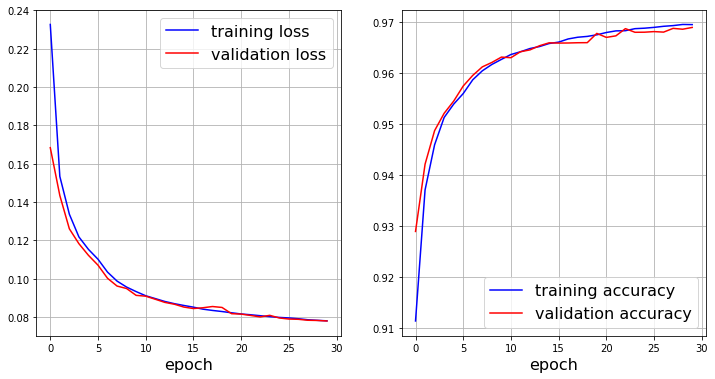

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

In [173]:
# train
score = cnn.evaluate(x_train, y_train, batch_size=64, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
# validation
score = cnn.evaluate(x_val, y_val, batch_size=64, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Train loss: 0.07774094514935105
Train accuracy: 0.9696242
Val loss: 0.07798503756523133
Val accuracy: 0.9689164


In [ ]:
# Conclusion: CNN has highest accuracy for validation model, so I decide to use CNN model to fit testing dataset

# Part5. Testing Result

In [195]:
# shows the weighted accuracy and loss
score = cnn.evaluate(x_train, y_train, batch_size=64, verbose=0)
print('Test loss is:', score[0])
print('Test accuracy is:', score[1]) # The accuracy is about 0.97%

Test loss is: 0.07774094514935105
Test accuracy is: 0.9696242


In [196]:
y_test_pred=cnn.predict(x_test, batch_size=64)

In [197]:
np.argmax(y_test_pred,1) # shows all predict labels

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [198]:
y_test # all real labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)